In [81]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm

import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

import flock_measures as flock

In [94]:
location = 'Cape_Hatteras'
member = 6
std = 0.1

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{std*100:03.0f}/{location}_dr{std*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)

In [95]:
lons = pset['lon'][:, :].values
lats = pset['lat'][:, :].values

CM_lons, CM_lats = flock.center_of_mass_displacement(pset['lon'], pset['lat'])
CM_lons += np.mean(lons[:,0])
CM_lats += np.mean(lats[:,0])

sigma_lons, sigma_lats = flock.center_of_mass_spread(lons, lats)

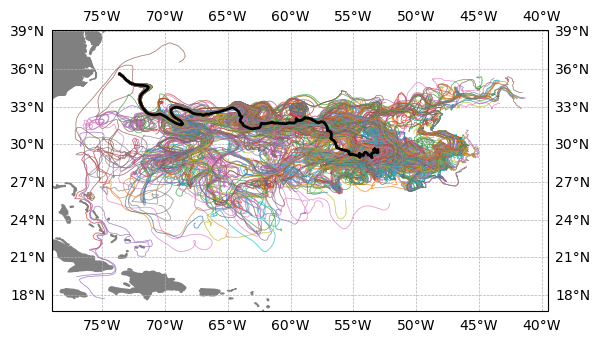

In [97]:
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.set_extent([-78, -70, 33, 40], crs=cartopy.crs.PlateCarree())
# ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=0, color='gray')
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

for i in range(1000):
    ax.plot(lons[i,:], lats[i,:], lw=0.5, alpha=0.5);

ax.plot(CM_lons, CM_lats, 'k', lw=2)

In [98]:
D, D_mean, D_std = flock.relative_dispersion(lons, lats, CM_lons, CM_lats)

Text(0, 0.5, 'Mean Displacement from Center of Mass [km]')

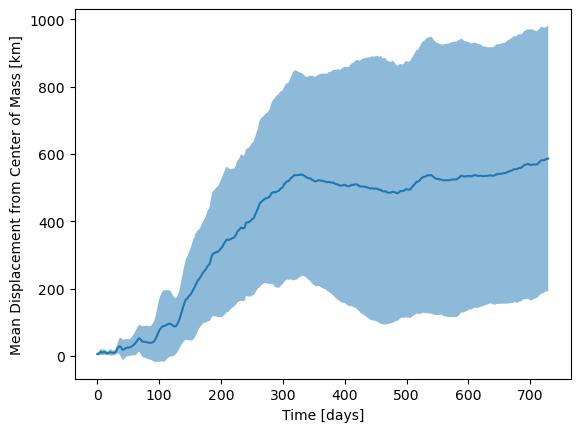

In [99]:
plt.plot(D_mean/1000)
plt.fill_between(np.arange(len(D_mean)), (D_mean-D_std)/1000, (D_mean+D_std)/1000, alpha=0.5)
plt.xlabel('Time [days]')
plt.ylabel('Mean Displacement from Center of Mass [km]')


In [87]:
25/60*10*6

25.0

In [88]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [122]:
location = 'Cape_Hatteras'
N_members = 7
N_obs = len(pset.obs)
D_means = np.zeros((N_members, N_obs))
D_stds = np.zeros_like(D_means)
CM_lons = np.zeros_like(D_means)
CM_lats = np.zeros_like(D_means)
delta_r = 0.1

for member in range(1,N_members+1):
    print(f"Member {member}")

    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    pset = xr.open_zarr(file_path)
    
    lons = pset['lon'][:, :].values
    lats = pset['lat'][:, :].values
    
    CM_x, CM_y = flock.center_of_mass_displacement(lons, lats)
    CM_x += np.mean(lons[:, 0])
    CM_y += np.mean(lats[:, 0])
    
    CM_lons[member-1,:] = CM_x
    CM_lats[member-1,:] = CM_y
    
    _, _D_mean, _D_std = flock.relative_dispersion(lons, lats, CM_x, CM_y)
    
    D_means[member-1,:] = _D_mean
    D_stds[member-1,:] = _D_std
    
D_means = D_means/1000
D_stds = D_stds/1000

Member 1
Member 2
Member 3
Member 4
Member 5
Member 6
Member 7


Text(0.5, 1.0, 'Center of Mass Displacement $\\delta r = 0.1$')

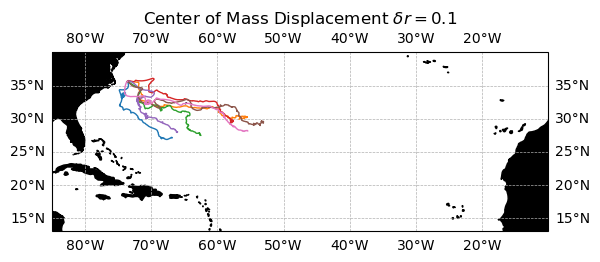

In [123]:
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-85, -10, 13, 40], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

for i in range(7):
    ax.plot(CM_lons[i,:], CM_lats[i,:], lw=1)
    
plt.title(f"Center of Mass Displacement $\\delta r = {delta_r}$")


Text(0.5, 1.0, 'Relative Dispersion $\\delta r = 0.1$')

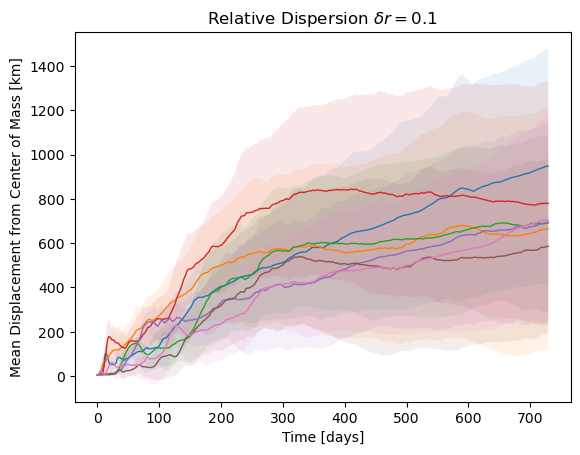

In [124]:
for i in range(7):
    plt.plot(D_means[i,:], lw=1)

    plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('Mean Displacement from Center of Mass [km]')
plt.title(f"Relative Dispersion $\\delta r = {delta_r}$")

Text(0.5, 1.0, 'Center of Mass Displacement Spread $\\delta r = 0.1$')

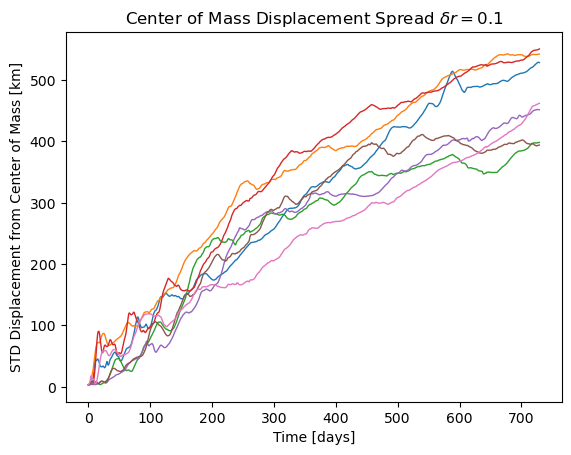

In [125]:

for i in range(7):
    plt.plot(D_stds[i,:], lw=1)

    # plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('STD Displacement from Center of Mass [km]')
plt.title(f"Center of Mass Displacement Spread $\\delta r = {delta_r}$")

In [116]:
location = 'Cape_Hatteras'
N_members = 7
N_obs = len(pset.obs)
D_means = np.zeros((N_members, N_obs))
D_stds = np.zeros_like(D_means)
CM_lons = np.zeros_like(D_means)
CM_lats = np.zeros_like(D_means)
delta_r = 1.

for member in range(1,N_members+1):
    print(f"Member {member}")

    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    pset = xr.open_zarr(file_path)
    
    lons = pset['lon'][:, :].values
    lats = pset['lat'][:, :].values
    
    CM_x, CM_y = flock.center_of_mass_displacement(lons, lats)
    CM_x += np.mean(lons[:, 0])
    CM_y += np.mean(lats[:, 0])
    
    CM_lons[member-1,:] = CM_x
    CM_lats[member-1,:] = CM_y
    
    _, _D_mean, _D_std = flock.relative_dispersion(lons, lats, CM_x, CM_y)
    
    D_means[member-1,:] = _D_mean
    D_stds[member-1,:] = _D_std
    
D_means = D_means/1000
D_stds = D_stds/1000

Member 1
Member 2
Member 3
Member 4
Member 5
Member 6
Member 7


Text(0.5, 1.0, 'Center of Mass Displacement $\\delta r = 1.0$')

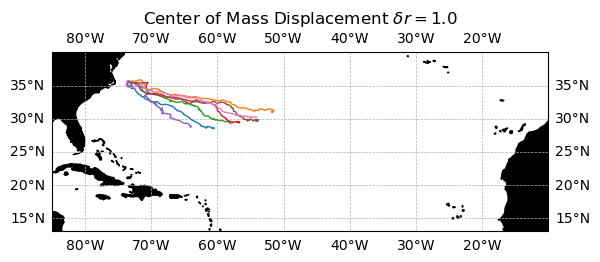

In [117]:
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-85, -10, 13, 40], crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)

for i in range(7):
    ax.plot(CM_lons[i,:], CM_lats[i,:], lw=1)
    
plt.title(f"Center of Mass Displacement $\\delta r = {delta_r}$")


Text(0.5, 1.0, 'Mean Displacement from Center of Mass $\\delta r = 1.0$')

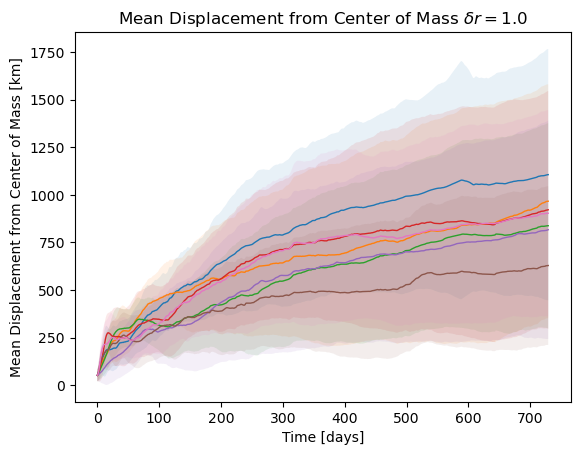

In [120]:
for i in range(7):
    plt.plot(D_means[i,:], lw=1)

    plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('Mean Displacement from Center of Mass [km]')
plt.title(f"Mean Displacement from Center of Mass $\\delta r = {delta_r}$")

Text(0.5, 1.0, 'STD Displacement from Center of Mass $\\delta r = 1.0$')

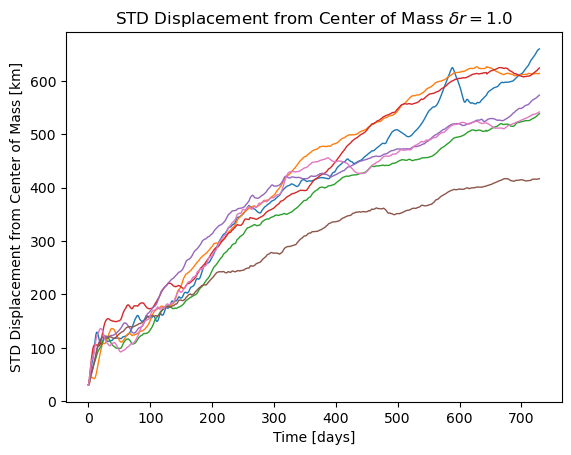

In [121]:

for i in range(7):
    plt.plot(D_stds[i,:], lw=1)

    # plt.fill_between(np.arange(N_obs), D_means[i,:]-D_stds[i,:], D_means[i,:]+D_stds[i,:], alpha=0.1)
    
plt.xlabel('Time [days]')
plt.ylabel('STD Displacement from Center of Mass [km]')
plt.title(f"STD Displacement from Center of Mass $\\delta r = {delta_r}$")